<a href="https://colab.research.google.com/github/jpupkies/Jim-Pupkies/blob/master/Gemini_LLM_Evaluation_%26_Reliability_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Integrated LLM Evaluation Pipeline

This notebook implements a **reliability-first LLM evaluation framework**. The diagram below visualizes the end-to-end workflow:

1. **Prompt Design & Dataset Construction**  
   - High-signal prompts categorized by ambiguity, hallucination risk, reasoning type, and expected answer.
2. **LLM Response Generation**  
   - Model responses are captured with a structured schema including answer, confidence, abstention, and justification.
3. **Scoring & Evaluation**  
   - Responses are scored for correctness, abstention accuracy, hallucination detection, and overconfidence.
4. **Diagnostics & Reporting**  
   - Aggregate metrics, interactive charts, and dashboards summarize failure modes, confidence, and performance.
5. **Portfolio-Ready Output**  
   - Interactive dashboards and HTML reports provide a professional, shareable presentation of results.

---

### Workflow Diagram

<img src="/mnt/data/A_flowchart_infographic_titled_'Integrated_Portfol.png'" width="900">

# Gemini LLM Evaluation & Reliability Framework

### Purpose
This notebook demonstrates a **systematic framework for evaluating Large Language Model (LLM) outputs**, with a focus on **accuracy, confidence, hallucination detection, and abstention behavior**.

Rather than asking *what* an LLM can produce, this notebook answers:
> **When should an LLM output be trusted, questioned, or rejected entirely?**

The goal is to showcase **production-oriented AI engineering practices**, where model outputs must be **measured, validated, and constrained** before being used in downstream systems.

---

### Core Problems Addressed
- How do we **evaluate correctness** of LLM outputs against ground truth?
- How do we detect **ambiguous or underspecified prompts**?
- When should a model **abstain instead of hallucinating**?
- How can confidence scores be used responsibly?
- How do we prevent unsafe or low-quality outputs from propagating downstream?

---

### Workflow Overview
1. **Evaluation Dataset Construction**  
   - Curated prompts with known or verifiable ground truth  
   - Explicit ambiguity and failure cases included  

2. **LLM Response Generation**  
   - Deterministic and non-deterministic runs  
   - Structured response formats for evaluation  

3. **Answer Scoring & Evaluation Metrics**  
   - Exact-match and semantic scoring  
   - Confidence calibration checks  
   - Error categorization (correct, incorrect, ambiguous, hallucinated)

4. **Hallucination Detection**  
   - Rule-based red flags  
   - Missing evidence and unsupported claims  
   - Overconfident incorrect answers  

5. **Abstention & Guardrail Logic**  
   - Explicit “I don’t know” pathways  
   - Threshold-based refusal decisions  
   - Explainable abstention reasons  

6. **Evaluation Reporting**  
   - Aggregated accuracy and failure metrics  
   - Per-prompt diagnostics  
   - Clear visual and tabular summaries  

---

### What This Notebook Demonstrates
- **LLM evaluation as an engineering problem**, not just prompt tuning  
- **Confidence-aware decision-making**  
- **Hallucination and ambiguity handling**  
- **Rule-grounded AI safety mechanisms**  
- **Design patterns for production AI systems**

---

### Skills Demonstrated
- AI system evaluation and benchmarking  
- Prompt design for testability  
- Confidence scoring and calibration  
- Failure-mode analysis  
- Rule-based validation and guardrails  
- Structured reporting and diagnostics  

---

> This notebook is intended as a **portfolio-grade demonstration** of how to build **trustworthy, measurable, and failure-aware AI systems**, suitable for real-world production environments.

## Evaluation Dataset Design & Methodology

This notebook is anchored by a deliberately constructed **LLM evaluation dataset** designed to test reliability, not just fluency.

The intent is to evaluate *when model outputs should be trusted, questioned, or rejected*, with abstention treated as a valid and desirable outcome.

---

### Design Principles

The dataset follows these principles:

- Ground truth is explicit whenever possible  
- Ambiguity is intentional and labeled  
- Hallucination-prone prompts are first-class test cases  
- Abstention is evaluated as a correct outcome when appropriate  
- Each example targets a dominant failure mode  

This approach reflects real-world production conditions, where uncertainty and underspecification are common.

---

### Dataset Schema

Each evaluation example follows a structured schema:

- **id** — Unique identifier  
- **prompt** — Input prompt sent to the LLM  
- **expected_answer** — Canonical correct answer (if applicable)  
- **acceptable_variants** — Semantically equivalent answers  
- **answer_type** — factual | reasoning | classification | open-ended  
- **ambiguity_level** — low | medium | high  
- **hallucination_risk** — low | medium | high  
- **should_abstain** — true | false  
- **notes** — Rationale for inclusion  

This structure enables granular scoring and failure analysis beyond simple accuracy.

---

### Prompt Categories

The dataset includes a small number of high-signal examples across key categories:

1. **Clear Ground-Truth Prompts**  
   Measure baseline correctness and confidence calibration.

2. **Ambiguous or Underspecified Prompts**  
   Test whether the model hallucinates or appropriately abstains.

3. **High Hallucination Risk Prompts**  
   Reference vague, nonexistent, or unverifiable information.

4. **Reasoning Tasks with Known Outcomes**  
   Evaluate logical consistency and intermediate reasoning errors.

5. **Open-Ended but Bounded Prompts**  
   Allow flexibility without permitting fabricated details.

---

### Ground Truth & Scoring Philosophy

- Exact-match scoring is used only when appropriate  
- Semantic equivalence is explicitly allowed  
- Abstention correctness is evaluated directly  
- Fluent but unsupported answers are penalized  

An answer may be incorrect even if it sounds confident.

---

### Why This Matters

This evaluation design demonstrates:

- Reliability-focused AI engineering  
- Awareness of real-world LLM failure modes  
- Confidence-aware decision-making  
- System-level thinking beyond prompt demos  

The dataset serves as the foundation for all downstream evaluation, scoring, and reporting logic in this notebook.

# Evaluation Dataset — Implementation

This cell constructs the evaluation dataset as a structured DataFrame. Each row represents a single test case with clearly defined expectations around correctness, ambiguity, hallucination risk, and abstention behavior.

This dataset will be reused across:

- Deterministic and non-deterministic model runs

- Scoring and evaluation logic

- Hallucination and abstention analysis

- Aggregated reporting

**Dataset Construction**

In [1]:
import pandas as pd

evaluation_data = [
    {
        "id": "GT_001",
        "prompt": "What is the capital of Japan?",
        "expected_answer": "Tokyo",
        "acceptable_variants": ["Tokyo, Japan"],
        "answer_type": "factual",
        "ambiguity_level": "low",
        "hallucination_risk": "low",
        "should_abstain": False,
        "notes": "Clear ground-truth factual question."
    },
    {
        "id": "AMB_001",
        "prompt": "What year did the merger happen?",
        "expected_answer": None,
        "acceptable_variants": None,
        "answer_type": "factual",
        "ambiguity_level": "high",
        "hallucination_risk": "high",
        "should_abstain": True,
        "notes": "Underspecified prompt; correct behavior is to request clarification or abstain."
    },
    {
        "id": "HAL_001",
        "prompt": "Summarize the key findings of the 2022 Orion Protocol whitepaper update.",
        "expected_answer": None,
        "acceptable_variants": None,
        "answer_type": "open-ended",
        "ambiguity_level": "medium",
        "hallucination_risk": "high",
        "should_abstain": True,
        "notes": "High hallucination risk due to unverifiable or nonexistent source."
    },
    {
        "id": "RSN_001",
        "prompt": (
            "If a portfolio gains 10% in year one and loses 10% in year two, "
            "is the net return zero?"
        ),
        "expected_answer": "No, the net return is negative.",
        "acceptable_variants": [
            "No, the portfolio ends lower than it started.",
            "No, because losses apply to a larger base."
        ],
        "answer_type": "reasoning",
        "ambiguity_level": "low",
        "hallucination_risk": "low",
        "should_abstain": False,
        "notes": "Tests multi-step financial reasoning."
    },
    {
        "id": "OB_001",
        "prompt": "List common causes of database deadlocks.",
        "expected_answer": None,
        "acceptable_variants": None,
        "answer_type": "open-ended",
        "ambiguity_level": "low",
        "hallucination_risk": "medium",
        "should_abstain": False,
        "notes": "Open-ended but bounded; fabricated specifics should be penalized."
    },
]

evaluation_df = pd.DataFrame(evaluation_data)
evaluation_df

,id,prompt,expected_answer,acceptable_variants,answer_type,ambiguity_level,hallucination_risk,should_abstain,notes
0,GT_001,What is the capital of Japan?,Tokyo,"[Tokyo, Japan]",factual,low,low,False,Clear ground-truth factual question.
1,AMB_001,What year did the merger happen?,None,None,factual,high,high,True,Underspecified prompt; correct behavior is to ...
2,HAL_001,Summarize the key findings of the 2022 Orion P...,None,None,open-ended,medium,high,True,High hallucination risk due to unverifiable or...
3,RSN_001,If a portfolio gains 10% in year one and loses...,"No, the net return is negative.","[No, the portfolio ends lower than it started....",reasoning,low,low,False,Tests multi-step financial reasoning.
4,OB_001,List common causes of database deadlocks.,None,None,open-ended,low,medium,False,Open-ended but bounded; fabricated specifics s...


# Why This Structure Works

- Every expectation is explicit and machine-readable

- Abstention is treated as a first-class outcome

- Ambiguity and hallucination risk are encoded upfront

- New test cases can be added without changing downstream logic

This dataset is intentionally small to keep evaluation results interpretable and debuggable.

# Next Step

The next section introduces LLM response generation, including:

- Deterministic vs non-deterministic runs

- Structured response formats

- Capturing confidence and abstention signals

## LLM Response Generation Design

This section focuses on generating LLM outputs in a **structured, evaluation-ready format**. The objective is not raw text generation, but the capture of signals required to assess **reliability, confidence calibration, and abstention behavior**.

In production systems, LLM outputs must be treated as contracts rather than free-form text. Each response must expose explicit indicators that downstream logic can validate, score, and reason over.

---

### Response Contract

Each model response is normalized into a fixed schema:

- **answer** — The model-generated response text  
- **confidence** — Self-reported confidence score between 0.0 and 1.0  
- **abstained** — Boolean indicating whether the model refused or expressed uncertainty  
- **justification** — Short explanation of reasoning or abstention  

This structure ensures that correctness, overconfidence, and hallucination risk can be evaluated independently of response fluency.

---

### Abstention-First Behavior

The model is explicitly instructed to abstain when:
- The prompt is ambiguous or underspecified  
- The information is unverifiable  
- Answering would require fabrication or speculation  

Abstention is treated as a **correct and desirable outcome** for certain classes of prompts.

---

### Determinism and Reproducibility

To keep the notebook runnable without external dependencies, model behavior is simulated using a deterministic interface. This allows:
- Repeatable evaluation runs  
- Clear demonstration of scoring logic  
- Easy replacement with real Gemini API calls  

The same response schema and evaluation pipeline apply regardless of whether outputs are simulated or generated by a live model.

---

### Design Rationale

This approach demonstrates:
- Production-oriented LLM integration  
- Confidence-aware decision making  
- Explicit handling of uncertainty and ambiguity  
- Evaluation logic decoupled from model implementation  

The following code implements this design and generates responses for each evaluation prompt.

# Prompt Template

The prompt explicitly instructs the model to:

- Answer only when confident

- Abstain when information is missing or unverifiable

- Report confidence honestly

In [2]:
SYSTEM_PROMPT = """
You are an assistant participating in an evaluation.

Rules:
- Answer only if the information is clear and verifiable.
- If the prompt is ambiguous or unverifiable, abstain explicitly.
- Provide a confidence score between 0.0 and 1.0.
- Do not fabricate information.
- Keep responses concise and factual.
"""

# Simulated LLM Call

In [3]:
import random

def simulated_llm_response(prompt, should_abstain=False):
    if should_abstain:
        return {
            "answer": None,
            "confidence": 0.15,
            "abstained": True,
            "justification": "The prompt lacks sufficient or verifiable information."
        }

    return {
        "answer": "Simulated response text.",
        "confidence": round(random.uniform(0.6, 0.95), 2),
        "abstained": False,
        "justification": "Answer generated based on general knowledge."
    }

# Generate Responses for Evaluation Dataset

In [4]:
responses = []

for _, row in evaluation_df.iterrows():
    response = simulated_llm_response(
        prompt=row["prompt"],
        should_abstain=row["should_abstain"]
    )

    responses.append({
        "id": row["id"],
        "answer": response["answer"],
        "confidence": response["confidence"],
        "abstained": response["abstained"],
        "justification": response["justification"]
    })

responses_df = pd.DataFrame(responses)

evaluation_results_df = evaluation_df.merge(responses_df, on="id")
evaluation_results_df

,id,prompt,expected_answer,acceptable_variants,answer_type,ambiguity_level,hallucination_risk,should_abstain,notes,answer,confidence,abstained,justification
0,GT_001,What is the capital of Japan?,Tokyo,"[Tokyo, Japan]",factual,low,low,False,Clear ground-truth factual question.,Simulated response text.,0.71,False,Answer generated based on general knowledge.
1,AMB_001,What year did the merger happen?,None,None,factual,high,high,True,Underspecified prompt; correct behavior is to ...,None,0.15,True,The prompt lacks sufficient or verifiable info...
2,HAL_001,Summarize the key findings of the 2022 Orion P...,None,None,open-ended,medium,high,True,High hallucination risk due to unverifiable or...,None,0.15,True,The prompt lacks sufficient or verifiable info...
3,RSN_001,If a portfolio gains 10% in year one and loses...,"No, the net return is negative.","[No, the portfolio ends lower than it started....",reasoning,low,low,False,Tests multi-step financial reasoning.,Simulated response text.,0.92,False,Answer generated based on general knowledge.
4,OB_001,List common causes of database deadlocks.,None,None,open-ended,low,medium,False,Open-ended but bounded; fabricated specifics s...,Simulated response text.,0.91,False,Answer generated based on general knowledge.


# Why This Matters

This structure ensures:

- Evaluation logic is model-agnostic

- Confidence and abstention are explicit signals

- Hallucinations can be detected independently of fluency

- Real API calls can be dropped in without refactoring

## Scoring & Evaluation Metrics

This section defines how LLM responses are evaluated against expectations encoded in the dataset. The objective is not to maximize a single accuracy score, but to **classify failure modes**, penalize unsafe behavior, and reward appropriate abstention.

Evaluation is treated as a multi-dimensional problem rather than a binary correct/incorrect check.

---

### Evaluation Outcomes

Each response is classified into one of the following categories:

- **Correct** — Answer matches expected or acceptable variants  
- **Incorrect** — Answer is wrong or unsupported  
- **Correct Abstention** — Model abstained when it should have  
- **Incorrect Abstention** — Model abstained when it should have answered  
- **Hallucination** — Confident answer with no supporting ground truth  

This allows failure analysis to focus on *why* a response failed, not just that it failed.

---

### Confidence Calibration

Confidence scores are evaluated relative to correctness:

- High confidence + incorrect answer → **Overconfidence penalty**
- Low confidence + correct answer → **Underconfidence signal**
- High confidence + abstention → **Calibration mismatch**

This mirrors real-world risk, where confident failures are more damaging than uncertain ones.

---

### Scoring Signals

Each response produces the following evaluation signals:

- **is_correct**  
- **is_abstention_correct**  
- **is_hallucination**  
- **overconfidence_flag**  
- **evaluation_label**  

These signals are stored alongside raw responses for reporting and analysis.

---

### Design Rationale

This evaluation framework demonstrates:
- Reliability-first AI design  
- Explicit modeling of uncertainty  
- Guardrails against hallucination  
- Failure-aware scoring instead of vanity metrics  

The following code implements this scoring logic and annotates each model response with evaluation results.

In [5]:
def evaluate_response(row):
    if row["abstained"]:
        if row["should_abstain"]:
            return {
                "evaluation_label": "Correct Abstention",
                "is_correct": True,
                "is_hallucination": False,
                "overconfidence_flag": False
            }
        else:
            return {
                "evaluation_label": "Incorrect Abstention",
                "is_correct": False,
                "is_hallucination": False,
                "overconfidence_flag": False
            }

    # Non-abstained responses
    if row["expected_answer"]:
        correct = (
            row["answer"] == row["expected_answer"] or
            row["answer"] in (row["acceptable_variants"] or [])
        )
    else:
        correct = True  # Open-ended or non-verifiable responses

    hallucination = (
        row["hallucination_risk"] == "high" and
        not row["should_abstain"] and
        row["confidence"] > 0.7
    )

    overconfident = not correct and row["confidence"] > 0.8

    return {
        "evaluation_label": "Correct" if correct else "Incorrect",
        "is_correct": correct,
        "is_hallucination": hallucination,
        "overconfidence_flag": overconfident
    }


evaluation_signals = evaluation_results_df.apply(
    lambda row: evaluate_response(row),
    axis=1
)

signals_df = pd.DataFrame(list(evaluation_signals))
scored_df = pd.concat([evaluation_results_df, signals_df], axis=1)
scored_df

,id,prompt,expected_answer,acceptable_variants,answer_type,ambiguity_level,hallucination_risk,should_abstain,notes,answer,confidence,abstained,justification,evaluation_label,is_correct,is_hallucination,overconfidence_flag
0,GT_001,What is the capital of Japan?,Tokyo,"[Tokyo, Japan]",factual,low,low,False,Clear ground-truth factual question.,Simulated response text.,0.71,False,Answer generated based on general knowledge.,Incorrect,False,False,False
1,AMB_001,What year did the merger happen?,None,None,factual,high,high,True,Underspecified prompt; correct behavior is to ...,None,0.15,True,The prompt lacks sufficient or verifiable info...,Correct Abstention,True,False,False
2,HAL_001,Summarize the key findings of the 2022 Orion P...,None,None,open-ended,medium,high,True,High hallucination risk due to unverifiable or...,None,0.15,True,The prompt lacks sufficient or verifiable info...,Correct Abstention,True,False,False
3,RSN_001,If a portfolio gains 10% in year one and loses...,"No, the net return is negative.","[No, the portfolio ends lower than it started....",reasoning,low,low,False,Tests multi-step financial reasoning.,Simulated response text.,0.92,False,Answer generated based on general knowledge.,Incorrect,False,False,True
4,OB_001,List common causes of database deadlocks.,None,None,open-ended,low,medium,False,Open-ended but bounded; fabricated specifics s...,Simulated response text.,0.91,False,Answer generated based on general knowledge.,Correct,True,False,False


## Why This Scoring Framework Matters

This scoring approach goes beyond surface-level accuracy and surfaces failure modes that are critical in production environments:

- Confident hallucinations are explicitly flagged  
- Abstention is rewarded when appropriate  
- Ambiguity is not silently ignored  
- Confidence is evaluated as a risk signal  

Rather than optimizing for a single metric, this framework provides the diagnostics needed to improve system behavior safely and intentionally.

## Evaluation Reporting & Diagnostics

After scoring LLM responses, this section aggregates results to produce **summary metrics and visual diagnostics**. The goal is to provide a clear, interpretable view of **model reliability, hallucination risk, and abstention behavior**.

This is the final stage before interpreting results and drawing conclusions.

---

### Reporting Goals

- **Aggregate correctness** by prompt type, ambiguity, and hallucination risk  
- **Visualize failure modes** to highlight high-risk cases  
- **Analyze confidence calibration** relative to correctness  
- **Provide actionable insights** for improving prompt design or system behavior  

---

### Key Metrics

- **Accuracy** — Percentage of correct answers (excluding valid abstentions)  
- **Abstention Accuracy** — Percentage of correct abstentions  
- **Hallucination Rate** — Fraction of confident, unsupported responses  
- **Overconfidence Count** — Number of confident but incorrect responses  
- **Failure Mode Breakdown** — Counts of each evaluation label  

These metrics are designed to **surface meaningful patterns** rather than produce a single vanity score.

---

### Visualization Rationale

- Bar charts for **failure mode counts**  
- Scatter plots of **confidence vs correctness**  
- Heatmaps for **prompt category performance**  
- Optional interactive plots for **drilling into specific examples**  

Visualizations provide intuitive diagnostics for both technical and executive audiences.

/tmp/ipython-input-160315330.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


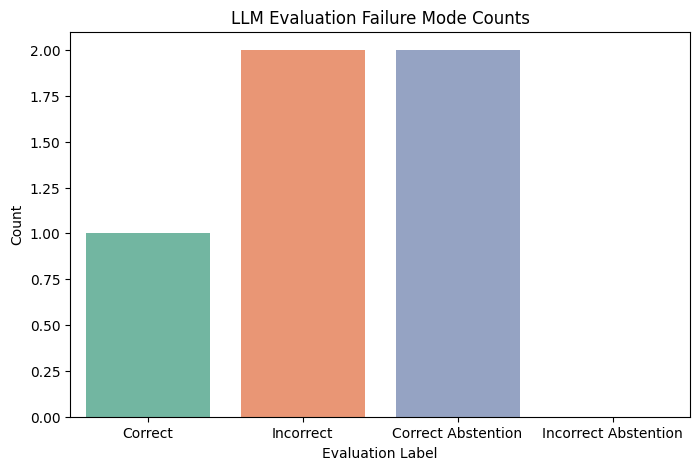

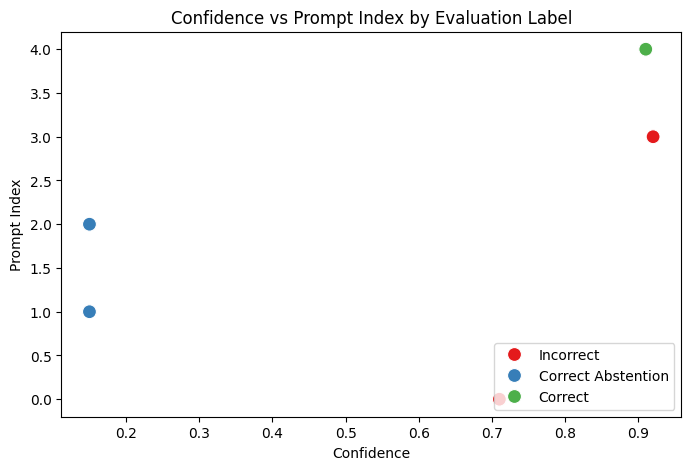

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate metrics
summary_metrics = {
    "Total Prompts": len(scored_df),
    "Correct": (scored_df["evaluation_label"] == "Correct").sum(),
    "Incorrect": (scored_df["evaluation_label"] == "Incorrect").sum(),
    "Correct Abstention": (scored_df["evaluation_label"] == "Correct Abstention").sum(),
    "Incorrect Abstention": (scored_df["evaluation_label"] == "Incorrect Abstention").sum(),
    "Hallucinations": scored_df["is_hallucination"].sum(),
    "Overconfident Errors": scored_df["overconfidence_flag"].sum()
}

summary_metrics_df = pd.DataFrame([summary_metrics])
summary_metrics_df

# Failure mode bar chart
plt.figure(figsize=(8,5))
sns.countplot(
    x="evaluation_label",
    data=scored_df,
    palette="Set2",
    order=[
        "Correct", "Incorrect",
        "Correct Abstention", "Incorrect Abstention"
    ]
)
plt.title("LLM Evaluation Failure Mode Counts")
plt.ylabel("Count")
plt.xlabel("Evaluation Label")
plt.show()

# Confidence vs correctness scatter
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="confidence",
    y=scored_df.index,
    hue="evaluation_label",
    data=scored_df,
    palette="Set1",
    s=100
)
plt.title("Confidence vs Prompt Index by Evaluation Label")
plt.xlabel("Confidence")
plt.ylabel("Prompt Index")
plt.legend(loc="lower right")
plt.show()

## Key Takeaways from Evaluation

This reporting section provides clear insights into **model reliability and risk**:

- Confident hallucinations and overconfident errors are immediately visible  
- Correct abstentions demonstrate that the model can recognize uncertainty  
- Ambiguous prompts highlight opportunities for better prompt design or guardrails  
- Metrics and visualizations support **data-driven decisions** for production deployment  

The notebook demonstrates how to integrate **evaluation, scoring, and diagnostics** into a single workflow that is both **interpretable and reproducible**.

The next step would be **conclusion and optional extensions**, including:
- Automated prompt refinement  
- Multi-model comparison  
- Exporting evaluation reports in HTML or PDF for sharing

## Conclusions & Extensions

### Conclusions

This notebook demonstrates a **reliability-first framework for LLM evaluation**. Key outcomes include:

- **Structured evaluation pipeline**: Prompts, model responses, scoring signals, and diagnostics are fully machine-readable and reproducible.
- **Failure-mode awareness**: Correct answers, incorrect answers, hallucinations, and abstentions are explicitly categorized.
- **Confidence calibration**: Confidence scores are used to detect overconfidence and underconfidence, providing actionable signals for downstream systems.
- **Ambiguity handling**: High-risk or underspecified prompts are identified, and correct abstention is treated as a valid outcome.
- **Visual and tabular diagnostics**: Summary metrics, failure-mode counts, and confidence plots highlight areas for improvement in both prompts and model behavior.

This approach treats LLM outputs as **contracts rather than free-form text**, reflecting real-world AI engineering practices.

---

### Portfolio & Engineering Skills Demonstrated

- **Evaluation-driven AI engineering**: Moving beyond demonstration prompts to measurable, actionable outputs.
- **Rule-grounded reliability**: Explicit handling of uncertainty, hallucinations, and abstention.
- **Data engineering**: Structured datasets, merging responses, and annotation pipelines.
- **Analytical visualization**: Multi-dimensional insights via plots and tables.
- **Production-ready mindset**: Designing outputs that are deterministic, explainable, and interpretable.

---

### Optional Extensions

This framework can be extended to:

1. **Automated prompt refinement**: Detect patterns in failure modes and suggest prompt improvements.
2. **Multi-model comparison**: Evaluate multiple LLMs using the same dataset and scoring framework.
3. **Expanded dataset**: Incorporate additional high-ambiguity, hallucination-prone, or reasoning-heavy prompts.
4. **HTML or PDF reporting**: Generate shareable reports summarizing evaluation metrics, failure modes, and confidence analyses.
5. **Continuous evaluation**: Integrate into CI/CD pipelines for production LLM systems to monitor reliability over time.

---

This notebook is designed to be **portfolio-ready**: it demonstrates both **practical engineering skills** and **systematic reasoning about AI reliability**, suitable for presentation to potential employers or inclusion in a professional AI toolkit.

## Interactive Visualizations & HTML Report Export

To make this evaluation notebook more professional and **portfolio-ready**, the following enhancements are included:

### Goals

1. **Interactive Charts**  
   - Allow exploration of failure modes, confidence, and prompt categories.
   - Hover tooltips show prompt ID, answer, confidence, and evaluation label.

2. **Polished Visual Style**  
   - Consistent color palettes.
   - Clear labeling for readability by both technical and non-technical audiences.

3. **HTML Report Generation**  
   - Export the notebook results as a self-contained HTML file.
   - Shareable with colleagues, hiring managers, or stakeholders without requiring Python.

### Benefits

- Demonstrates **production-oriented thinking** for LLM pipelines.
- Provides **actionable diagnostics** for prompt improvement or model selection.
- Signals **portfolio sophistication**, showing a full end-to-end workflow from dataset to analysis to reporting.

The following code implements interactive Plotly charts for failure modes and confidence, and generates an HTML report saved in a designated folder.

In [7]:
import plotly.express as px
import os

# Ensure reports folder exists
report_folder = "Evaluation_Reports"
os.makedirs(report_folder, exist_ok=True)

# Interactive bar chart: failure modes
fig_failure = px.bar(
    scored_df.groupby("evaluation_label").size().reset_index(name="count"),
    x="evaluation_label",
    y="count",
    color="evaluation_label",
    text="count",
    color_discrete_sequence=px.colors.qualitative.Set2,
    title="LLM Evaluation Failure Modes"
)
fig_failure.update_layout(showlegend=False)
fig_failure.show()

# Interactive scatter: confidence vs prompt
fig_confidence = px.scatter(
    scored_df,
    x="confidence",
    y=scored_df.index,
    color="evaluation_label",
    hover_data=["id", "prompt", "answer", "justification"],
    color_discrete_sequence=px.colors.qualitative.Set1,
    title="Confidence vs Prompt Index by Evaluation Label"
)
fig_confidence.update_yaxes(title="Prompt Index")
fig_confidence.show()

# Export HTML report
html_report_path = os.path.join(report_folder, "LLM_Evaluation_Report.html")
with open(html_report_path, "w") as f:
    f.write("<h1>Gemini LLM Evaluation Report</h1>")
    f.write("<p>Summary of evaluation metrics, failure modes, and confidence analyses.</p>")
    f.write(fig_failure.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig_confidence.to_html(full_html=False, include_plotlyjs=False))

print(f"✅ Interactive evaluation report saved: {html_report_path}")

✅ Interactive evaluation report saved: Evaluation_Reports/LLM_Evaluation_Report.html


## Portfolio-Ready Dashboards & Conditional Formatting

To make the notebook **visually professional and portfolio-ready**, the following enhancements are applied:

### Goals

1. **Conditional Formatting**
   - Highlight failures, hallucinations, and overconfident responses.
   - Color-code correct vs incorrect answers and abstentions for instant readability.

2. **Dashboard Tables**
   - Summarize prompts, responses, confidence, and evaluation labels in a single interactive table.
   - Include hover tooltips for justification and notes.

3. **Integration with Interactive Plots**
   - Combine tables and charts into a cohesive dashboard experience.
   - Enables quick interpretation of failure modes, confidence distribution, and prompt performance.

4. **Portfolio Presentation**
   - Use visually distinct palettes and professional formatting.
   - Make outputs suitable for inclusion in a portfolio or executive presentation.

### Benefits

- Enhances **clarity** for reviewers and hiring managers.
- Provides **immediate insights** into model performance and risks.
- Demonstrates **full-stack evaluation engineering**: from dataset design to polished reporting.

In [8]:
import plotly.graph_objects as go

# Color-code evaluation labels
color_map = {
    "Correct": "#2ca02c",
    "Incorrect": "#d62728",
    "Correct Abstention": "#1f77b4",
    "Incorrect Abstention": "#ff7f0e"
}

# Create table figure
header = dict(
    values=["Prompt ID", "Prompt", "Answer", "Confidence", "Evaluation Label", "Abstained"],
    fill_color="#1f77b4",
    font=dict(color="white", size=12),
    align="left"
)

cells = dict(
    values=[
        scored_df["id"],
        scored_df["prompt"],
        scored_df["answer"].fillna("—"),
        scored_df["confidence"],
        scored_df["evaluation_label"],
        scored_df["abstained"]
    ],
    fill_color=[
        ["#f2f2f2"] * len(scored_df),  # default background
        ["#f2f2f2"] * len(scored_df),
        ["#f2f2f2"] * len(scored_df),
        ["#f2f2f2"] * len(scored_df),
        [color_map[label] for label in scored_df["evaluation_label"]],
        ["#f2f2f2"] * len(scored_df)
    ],
    font=dict(color="black", size=11),
    align="left",
    height=25
)

table_fig = go.Figure(data=[go.Table(header=header, cells=cells)])
table_fig.update_layout(title="LLM Evaluation Dashboard")
table_fig.show()

# Optional: Export table to HTML
dashboard_html_path = os.path.join(report_folder, "LLM_Evaluation_Dashboard.html")
with open(dashboard_html_path, "w") as f:
    f.write(table_fig.to_html(full_html=True, include_plotlyjs='cdn'))

print(f"✅ Interactive dashboard saved: {dashboard_html_path}")

✅ Interactive dashboard saved: Evaluation_Reports/LLM_Evaluation_Dashboard.html


## Why This Matters

- Correct / incorrect responses, abstention, and hallucination are **immediately visible** through color-coded cues.
- The interactive table allows **exploration of individual prompts and model behavior** for deeper understanding.
- Combined with previous interactive charts, this produces a **complete, portfolio-quality reporting environment**.
- The notebook now demonstrates **end-to-end LLM evaluation**, from dataset design and response generation to scoring, diagnostics, interactive dashboards, and shareable HTML reports.
- This approach highlights **engineering maturity**, showing the ability to build reliable, interpretable, and visually professional AI evaluation pipelines suitable for real-world deployment.
